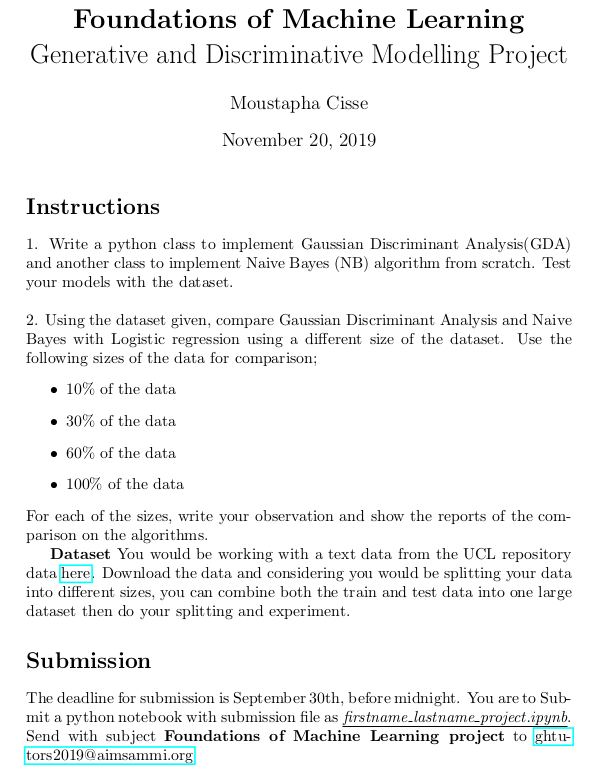

In [587]:
from IPython.display import Image
fig = Image(filename=('figm.png'))
fig

# Importing the labrairies

In [588]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from sklearn.utils import shuffle

# Reading the data

In [589]:
drugsComTrain_raw = pd.read_csv('drugLibTrain_raw.tsv',delimiter='\t')
drugsComTest_raw = pd.read_csv('drugLibTest_raw.tsv',delimiter='\t')

In [590]:
drugsComTrain_raw.shape

(3107, 9)

In [591]:
drugsComTest_raw.shape

(1036, 9)

In [592]:
drugsComTrain_raw.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [593]:
drugsComTest_raw.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [594]:

drugsComTrain_raw.rating.value_counts()

10    742
8     558
9     480
7     350
1     305
5     159
6     157
3     146
4     107
2     103
Name: rating, dtype: int64

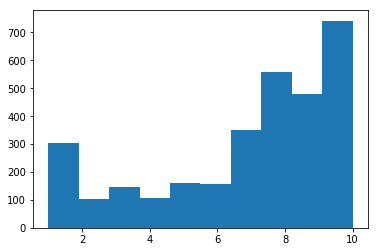

In [595]:

plt.hist(drugsComTrain_raw.rating)
plt.show()

In [596]:

d = {1: 1, 
     2: 2, 3:2, 
     4: 3, 5: 3,
     6: 4, 7: 4,
     8: 5, 9: 5,
     10: 6}

drugsComTrain_raw['new_ratings'] = drugsComTrain_raw.rating.map(d)
drugsComTest_raw['new_ratings'] = drugsComTest_raw.rating.map(d)

In [597]:
drugsComTrain_raw.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview',
       'new_ratings'],
      dtype='object')

In [598]:
all_reviews = []
for item in drugsComTrain_raw.benefitsReview:
    temp = item
    temp = temp.lower()
    cleanr = re.compile('<.*?>')
    temp = re.sub(cleanr, ' ', temp)
    temp = re.sub(r'[?|!|\'|"|#]',r'',temp)
    temp = re.sub(r'[.|,|)|(|\|/]',r'',temp) 

    all_reviews.append(temp)
    
all_reviews_test = []
for item in drugsComTest_raw.benefitsReview:
    temp = item
    temp = temp.lower()
    cleanr = re.compile('<.*?>')
    temp = re.sub(cleanr, ' ', temp)
    temp = re.sub(r'[?|!|\'|"|#]',r'',temp)
    temp = re.sub(r'[.|,|)|(|\|/]',r'',temp) 
    all_reviews_test.append(temp)

In [599]:
X = all_reviews
Y = drugsComTrain_raw.new_ratings
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)

In [600]:

x_test = all_reviews_test
y_test = drugsComTest_raw.new_ratings
x_test

['the antibiotic may have destroyed bacteria causing my sinus infection  but it may also have been caused by a virus so its hard to say',
 'lamictal stabilized my serious mood swings one minute i was clawing up the walls in pure mania the next curled up in a fetal position on my bed contemplating suicdie i am no longer at the whim of my moods and neither are those around me im lucky that i started pharmaceuticals almost immediately after i was diagnosed a bipolar lamictal gives me amazing clarity to go about my day honestly assess myself and form real relationships lamitcal lifted a fog i guess you could call it now that im medicated i realize how cloudy my thought processes used to be its a wonderful feeling\r\r\n\r\r\ninterestingly i hardly dreamt before beginning lamictal i would dream i mean dream in the sense of being able to imagine pictures and scenes while asleep not rem maybe once every two months now i dream every night i found that the closer i take it to bedtime the more fr

# Changing the data type

In [601]:

vectorizer = TfidfVectorizer(ngram_range=(1,2))

x_train_vectors = vectorizer.fit_transform(x_train)
x_valid_vectors = vectorizer.transform(x_valid)
x_test_vectors = vectorizer.transform(x_test)

selector = SelectKBest(f_classif, k=min(60, x_train_vectors.shape[1]))
selector.fit(x_train_vectors, y_train)
x_train_vectors = selector.transform(x_train_vectors).astype('float32')

x_valid_vectors = selector.transform(x_valid_vectors).astype('float32')
x_test_vectors = selector.transform(x_test_vectors).astype('float32')

In [602]:
x_train_vectors.shape, y_train.shape

((2485, 60), (2485,))

In [603]:

more_classes = list(map(lambda x: x in [1, 6], y_train.tolist()))
few_classes = list(map(lambda x: x in list(range(2, 6)), y_train.tolist()))


np.sum(few_classes)


few_classes = np.array(few_classes)
more_classes = np.array(more_classes)

x_train_few = x_train_vectors[few_classes]
y_train_few = y_train[few_classes]

x_train_more = x_train_vectors[more_classes]
y_train_more = y_train[more_classes]


all_x_train = list(x_train_few)
all_y_train = list(y_train_few)

for i in range(2):
    all_x_train.extend(x_train_few)
    all_y_train.extend(y_train_few)
    
all_x_train.extend(x_train_more)
all_y_train.extend(y_train_more)


all_x_train = np.concatenate([x_train_more.toarray(), x_train_few.toarray(), x_train_few.toarray(), x_train_few.toarray()], axis=0)
all_y_train = np.concatenate([y_train_more, y_train_few, y_train_few, y_train_few], axis=0)


all_y_train.shape


new_x_train, new_y_train = shuffle(all_x_train, all_y_train)


new_x_train, new_y_train = shuffle(all_x_train, all_y_train)


new_x_train.shape

(5787, 60)

In [604]:
all_y_train.shape

(5787,)

In [605]:
all_x_train.shape

(5787, 60)

# IMPLEMENTATION OF CLASSES 

### Gaussian Discriminant Analysis

In [606]:
class GDA:
    def fit(self, X, y, tol = 1e-8):
        
        self.y_classes, y_counts = np.unique(y, return_counts=True)
        self.phi_y = y_counts/len(y)
        self.m_u = np.array([ X[y==k].mean(axis=0) for k in self.y_classes])
        self.sig = self.sigma(X, y)
        self.sig += np.ones_like(self.sig) * tol
        self.inv_sig = np.linalg.pinv(self.sig)
        return self
    
    
    def sigma(self,X, y):
        
        X_mu = X.copy()#.astype('object')
        for i in range(len(self.m_u)):
            X_mu[y==self.y_classes[i]] -= self.m_u[i]
        return X_mu.T.dot(X_mu) / len(y)
    
    
    def proba(self, x):
        p = np.exp(-1.0 * np.sum((x - self.m_u).dot(self.inv_sig) * (x - self.m_u), axis =1)) * self.phi_y
        return np.argmax(p)
    
    
    def score(self, X, y):
        
        print(self.predict(X))
        return (self.predict(X) == y).mean()
    
    
    def predict(self, X):
        return np.apply_along_axis(self.proba, 1, X)

### 10% of the data

In [632]:
# def split(data, percentage):
#     order = np.random.permutation(len(data))
#     data = data[order]
#     return data[:int(len(data)*percentage)]

In [633]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(all_x_train, all_y_train,test_size=0.1,random_state=101)

In [634]:
model = GDA().fit(X_train1,y_train1)
model.score(X_test1,y_test1)

[1 2 4 3 4 3 4 0 4 4 4 4 4 4 4 4 0 2 3 4 2 5 0 4 4 4 4 1 4 4 4 4 0 4 4 4 4
 1 4 4 4 4 5 4 0 0 4 0 4 4 4 4 0 4 3 4 0 4 4 4 4 4 4 1 4 4 4 4 4 0 4 4 4 4
 4 4 4 5 2 4 4 2 4 4 4 2 4 4 2 4 4 4 4 4 4 3 4 4 4 4 4 4 3 2 0 4 4 4 3 4 4
 4 4 0 1 4 4 4 4 0 3 4 2 4 4 4 4 4 4 5 4 4 3 0 4 4 4 4 4 4 4 4 2 4 4 4 4 4
 4 4 4 2 4 4 4 0 0 4 4 5 4 0 4 4 1 4 0 4 3 4 4 4 0 4 3 5 4 3 4 4 0 4 4 4 0
 1 4 4 4 4 4 4 4 4 4 4 4 0 4 0 1 4 4 4 0 3 4 4 5 4 4 4 4 4 0 5 4 4 4 4 2 4
 4 3 4 4 4 4 0 0 4 4 0 4 5 2 4 3 4 4 4 4 4 4 3 4 4 4 4 4 0 4 4 4 4 4 4 4 2
 0 4 5 4 4 4 2 4 3 4 0 4 4 5 4 3 4 4 4 4 4 4 4 4 0 4 2 4 4 4 5 3 4 4 0 4 0
 4 4 2 4 0 4 0 4 4 4 4 4 0 3 2 4 4 4 4 3 4 4 4 4 5 3 4 0 2 4 4 1 4 3 4 4 4
 4 4 4 4 2 4 4 4 3 3 4 4 0 0 5 4 4 0 4 5 4 1 4 4 4 4 0 3 4 4 2 4 4 4 4 4 4
 5 4 4 0 4 4 4 4 4 2 5 3 0 4 0 4 4 4 4 4 4 0 3 4 4 4 3 4 4 4 4 4 0 4 4 4 4
 4 4 4 5 4 0 4 4 4 4 2 4 0 2 4 0 4 4 4 2 4 3 4 4 5 4 4 4 0 5 5 4 4 3 4 4 4
 4 4 4 5 4 4 4 0 2 4 4 0 1 4 4 4 3 3 2 4 4 1 3 4 4 0 4 4 4 4 4 2 4 4 4 4 3
 4 4 3 4 4 2 4 1 0 4 4 4 

0.2158894645941278


## Observation:

### with 10% of the data, the accuraccy gives us 21,41% which is not good. Let us add a little bit more data


### 30% of the data

In [639]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(all_x_train, all_y_train,test_size=0.3,random_state=101)

In [640]:
model = GDA().fit(X_train2,y_train2)
model.score(X_test2,y_test2)

[1 2 4 ... 0 4 4]


0.19516407599309155


## Observation:

### with 30% of the data, the accuraccy has reduced it's now 18,53% which is still bad. Let us add a little bit more data


### 60% of the data

In [641]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(all_x_train, all_y_train,test_size=0.6,random_state=101)

In [642]:
model = GDA().fit(X_train3,y_train3)
model.score(X_test3,y_test3)

[1 2 4 ... 4 4 4]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


0.18485459257126405

## Observation:

### with 60% of the data, the accuraccy is slightly lower than the previous, still bad. Let us add a little bit more data 

### 99% of the data 

In [643]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(all_x_train, all_y_train,test_size=0.99)

In [644]:
model = GDA().fit(X_train4,y_train4)
model.score(X_test4,y_test4)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


[0 1 4 ... 0 0 0]


0.07766143106457242

## Observation:

### with 99% of the data, the accuraccyn (18.63) is slightly larger than the previous, still bad. 

### So for GDA, we don't see any good variation (increase or decrease) when we increse or decrease the step size. 

# Multiclass Naive Bayes

In [645]:
class Multi_NB:
    
    def fit(self, X, y):
        
        self.y_classes, y_counts = np.unique(y, return_counts=True)
        
        self.x_classes = np.array([np.unique(x) for x in X.T])
        
        self.phi_y = y_counts/y_counts.sum()
        
        self.phi_x = self.mean_x(X, y)
        #print(self.y_classes)
        return self
    
    def mean_x(self, X, y):
        
        return [[(X[:,j][y==k].reshape(-1,1) == self.x_classes[j]).mean(axis=0)
                       for j in range(len(self.x_classes))]
                      for k in self.y_classes]
    
    def predict(self, X):
        
        return np.apply_along_axis(lambda x: self.compute_prob(x), 1, X)
    
    def compute_prob(self, x):
        
        prob = np.array([self.get_prob(x, y) for y in range(len(self.y_classes))])
        return self.y_classes[np.argmax(prob)]
    
    def get_prob(self, x, y):
        
        Px_y = 1
        for j in range(len(x)):
            if x[j] in self.x_classes[j]: 
                i = list(self.x_classes[j]).index(x[j])
            else:
                continue
            Px_y *= self.phi_x[y][j][i] 
        return Px_y * self.phi_y[y]
    
    def evaluate(self, X, y):
        
        return (self.predict(X) == y).mean()

### 10% of the data

In [646]:
model = Multi_NB().fit(X_train1,y_train1)
model.evaluate(X_test1,y_test1)

0.8065630397236615

## Observation:

### with 10% of the data, the accuraccy is hight 80.65% the previous, wich is good. Let us add a little bit more data  

### 30% of the data 

In [647]:
model = Multi_NB().fit(X_train2,y_train2)
model.evaluate(X_test2,y_test2)

0.7795048934945308

## Observation:

### the accuraccy is good (78%) with 30% of data, but less than the previous case. Let us add a little bit more data  

### 60% of the data

In [648]:
model = Multi_NB().fit(X_train3,y_train3)
model.evaluate(X_test3,y_test3)

0.7002591419522027

## Observation:

### the accuraccy has decreased (67.88%) with 60% of data. Let us add a little bit more data.   

### 99% of the data

In [649]:
model = Multi_NB().fit(X_train4,y_train4)
model.evaluate(X_test4,y_test4)

0.24171029668411867

In [650]:
X_train1.shape, X_train2.shape, X_train3.shape, X_train4.shape

((5208, 60), (4050, 60), (2314, 60), (57, 60))

## Observation:

### the accuraccy has decreased a lot (17.78%) with 99% of data.   

### with Multiclass Naive Bayes, we realize that when we increase th test_size, the accuracy reduces

# Multiclass Logistic regression

In [651]:
import numpy as np

class MultiLogisticRegression:
        
    def fit(self, X, y, epochs=10):
        
        self.classes = np.unique(y)
        
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        
        y=self.one_hot(y)
        
        self.loss = []
        
        X = np.insert(X, 0, 1, axis=1)
        
        self.weights = np.zeros(shape=(len(self.classes), X.shape[1]))
        
        Xs = X.T.dot(X)
        
        for i in range(epochs):
            self.loss.append(self.cross_entropy(y, self.predict2(X)))
            h = self.predict2(X)
            invH =  np.linalg.pinv(Xs * np.sum(h.T.dot(1-h)))
            gradient = (h - y).T.dot(X)
            self.weights -= gradient.dot(invH)
            #print(' Training Accuray at {} iterations is {}'.format(i+1, self.score_(X, y)))
        return self
    
    def predict(self, X):
        
        pr1=self.predict2(np.insert(X, 0, 1, axis=1))
        return pr1
    
    def predict2(self, X):
        
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.sftmax(pre_vals)
    
    def sftmax(self, Z):
        return np.exp(Z) / np.sum(np.exp(Z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        return np.argmax(self.predict(X), axis=1)

#     def one_hot(self, y):
#         return np.eye(len(self.classes))[y.reshape(-1)]
    
    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
    
    def score2(self, X, y):
        probs = self.predict2(X)
        return np.mean(np.argmax(probs, axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return (-1 / len(probs)) * (y * np.log(probs)).sum()



### 10% of the data

In [652]:
result = []

In [653]:
model = MultiLogisticRegression().fit(X_train1,y_train1)
model.score(X_test1,y_test1)


0.21243523316062177

## Observation:

### with 10% of the data, the accuraccy gives us 21,41% which is not good. 

### 30% of the data 

In [654]:
model = MultiLogisticRegression().fit(X_train2,y_train2)
model.score(X_test2,y_test2)

0.2003454231433506

## Observation:

### with 30% of the data, the accuraccy gives us 18,71% which is not good. 

### 60% of the data

In [655]:
model = MultiLogisticRegression().fit(X_train3,y_train3)
a=model.score(X_test3,y_test3)
a

0.19003743161531816

## Observation:

### with 60% of the data, the accuraccy gives us 19.34%, still not good. 

### 99% of the data

In [656]:
model = MultiLogisticRegression().fit(X_train4,y_train4)
model.score(X_test4,y_test4)

0.17137870855148343

## Observation:

### with 99% of the data, the accuraccy gives us 16.19% which is not good. 

### Here again, we face the same situation as in the case of GDA

# visualize their evolution on a graph

In [657]:
import pandas as pd 
  

data = {'GDA':[.214, .183, .173, .068], 'Multi_NB':[.806, .780, .678, .177], 'MultiLogisticRegres':[.214, .187, .188, .161]} 
  
 
df = pd.DataFrame(data, index =['10%', '30%', '60%', '100%']) 
  
df 

,GDA,Multi_NB,MultiLogisticRegres
10%,0.214,0.806,0.214
30%,0.183,0.780,0.187
60%,0.173,0.678,0.188
100%,0.068,0.177,0.161


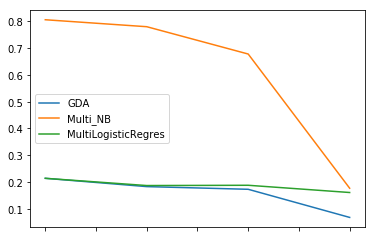

In [658]:
lines = df.plot.line()

# CONCLUSION

### in summary, we can say that the accuracy decreases as we decrease the size of the data. For all our models, the accurary is low except for multivariate Naive Bayes wich is around 80% for the 10% of the data. We can say that, GDA and Multiclass LogisticRegression are not good models for our data set.